**Introducción:**


La detección de fraudes en tarjetas de crédito es un problema crítico en el ámbito financiero que afecta a instituciones financieras y consumidores por igual. Con el crecimiento del comercio electrónico y las transacciones digitales, los métodos de fraude también han evolucionado, lo que hace que la detección de fraudes sea una tarea cada vez más desafiante.

En este contexto, el aprendizaje automático supervisado se ha convertido en una herramienta invaluable para abordar este problema. Al aprovechar conjuntos de datos históricos que contienen transacciones etiquetadas como legítimas o fraudulentas, los algoritmos de aprendizaje automático pueden aprender patrones y características que distinguen entre transacciones genuinas y fraudulentas. Estos modelos entrenados luego pueden utilizarse para predecir y clasificar nuevas transacciones en tiempo real.

El conjunto de datos de detección de fraudes en tarjetas de crédito utilizado en este estudio proporciona un ejemplo práctico de cómo se aplica el aprendizaje automático supervisado en la detección de fraudes. Contiene una amplia gama de características derivadas de transacciones, como el monto, la ubicación, la hora del día y más. Utilizando estos datos, podemos entrenar modelos de aprendizaje automático para identificar patrones sutiles que son indicativos de actividades fraudulentas, proporcionando así una defensa eficaz contra el fraude en el ámbito de las transacciones financieras.

* En este trabajo, exploraremos cómo el algoritmo de Random Forest, un enfoque de aprendizaje automático basado en árboles de decisión, puede ser utilizado para abordar este desafío

* Analizaremos cómo este modelo puede aprender de manera efectiva los patrones en los datos históricos para identificar y prevenir transacciones fraudulentas, y evaluaremos su rendimiento utilizando métricas adecuadas de evaluación de modelos.



***La detección de fraudes en tarjetas de crédito es un problema de aprendizaje automático supervisado:***

* En este tipo de problema, contamos con un conjunto de datos etiquetado que contiene ejemplos de transacciones con tarjeta de crédito, donde cada transacción está etiquetada como legítima o fraudulenta.

* Estos datos etiquetados se utilizan para entrenar un modelo de aprendizaje automático que pueda aprender patrones y características que distingan entre transacciones legítimas y fraudulentas.

* Una vez que el modelo está entrenado, se puede utilizar para predecir la clase (legítima o fraudulenta) de nuevas transacciones basadas en sus características.

* Este proceso se conoce como aprendizaje supervisado, ya que el modelo aprende de ejemplos etiquetados proporcionados durante el entrenamiento y luego se le "supervisa" para hacer predicciones sobre nuevos datos.

**La fuente original del conjunto de datos**

Repositorio de datos de Kaggle, plataforma en línea para la comunidad de ciencia de datos:(Credit Card Fraud Detection) https://www.kaggle.com/
https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud/code

* Este conjunto de datos específico se puede acceder a través de la API de OpenML o directamente desde la biblioteca scikit-learn en Python utilizando la función fetch_openml()

* El conjunto de datos contiene transacciones de tarjetas de crédito realizadas durante dos días, donde tenemos 492 transacciones fraudulentas de un total de 284,807 transacciones

* Cada transacción está descrita por 30 atributos numéricos derivados de un proceso de transformación PCA (Análisis de Componentes Principales) por razones de confidencialidad. La variable objetivo es binaria, indicando si la transacción es fraudulenta (1) o legítima (0).

* En este proyecto, la variable objetivo o variable dependiente es 'Class', que representa si una transacción con tarjeta de crédito es fraudulenta (1) o legítima (0).
* Esta es la variable que el modelo intenta predecir utilizando las características proporcionadas en el conjunto de datos.

In [2]:
# Importar librerías
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.datasets import fetch_openml

# Cargar el conjunto de datos de detección de fraudes en tarjetas de crédito
credit_card_data = fetch_openml(name='creditcard', version=1, as_frame=True, parser='auto')

# Convertir a formato DataFrame
df = credit_card_data.frame

# Separar características (X) y etiquetas (y)
X = df.drop(columns=['Class'])
y = df['Class']

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar un clasificador Random Forest
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

# Predecir en el conjunto de prueba usando el clasificador Random Forest
y_pred = rf_clf.predict(X_test)

# Calcular la precisión del clasificador Random Forest
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del clasificador Random Forest:", accuracy)


Precisión del clasificador Random Forest: 0.9995611109160493


**Precisión del clasificador Random Forest: 0.9995611109160493**

* Muestra el resultado de la evaluación del rendimiento del clasificador Random Forest en el conjunto de prueba.
* La precisión se calcula como la proporción de las predicciones correctas (verdaderos positivos y verdaderos negativos) entre el total de predicciones realizadas por el modelo.

* En este caso, la precisión obtenida es de aproximadamente 0.99956, lo que indica que el clasificador Random Forest clasificó correctamente el 99.956% de las transacciones en el conjunto de prueba.
* Es decir, la gran mayoría de las transacciones, tanto legítimas como fraudulentas, fueron clasificadas correctamente por el modelo.

**Entonces:**
* Una precisión tan alta sugiere que el modelo tiene un buen desempeño en la detección de fraudes en tarjetas de crédito en este conjunto de datos específico.

* Sin embargo, dado que este conjunto de datos está altamente desbalanceado (con una pequeña proporción de transacciones fraudulentas), también sería importante considerar otras métricas de evaluación del modelo, como la sensibilidad (recall), la especificidad y el área bajo la curva ROC (AUC-ROC), para obtener una imagen más completa del rendimiento del modelo.

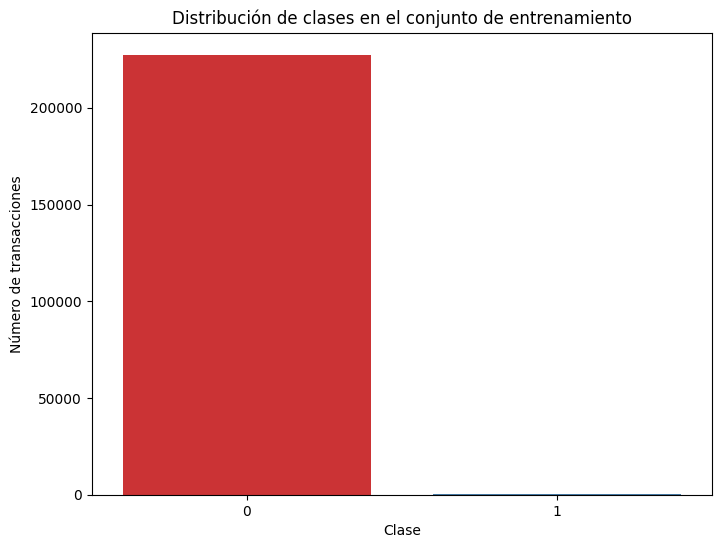

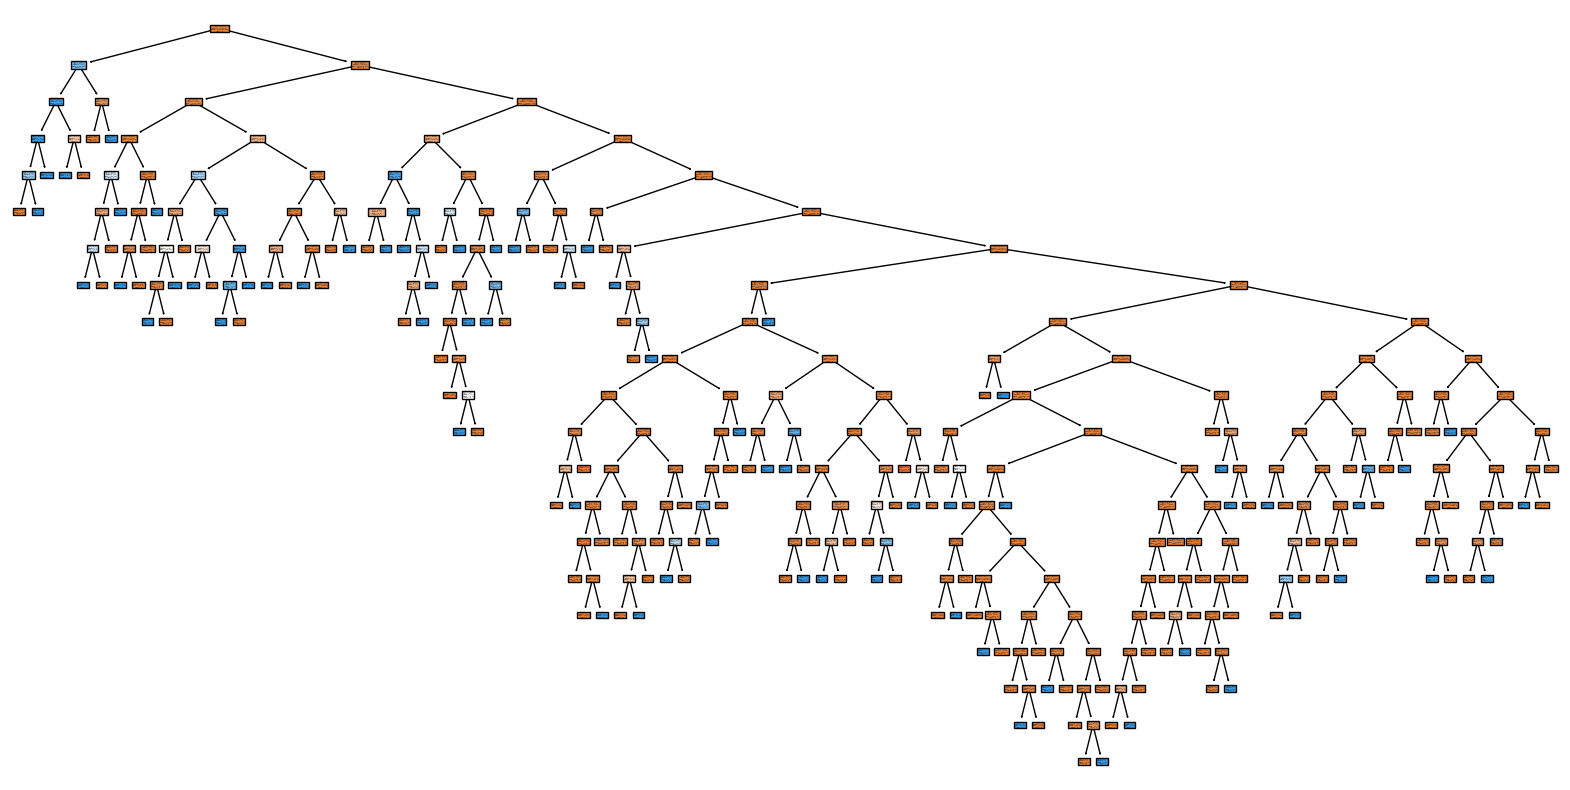

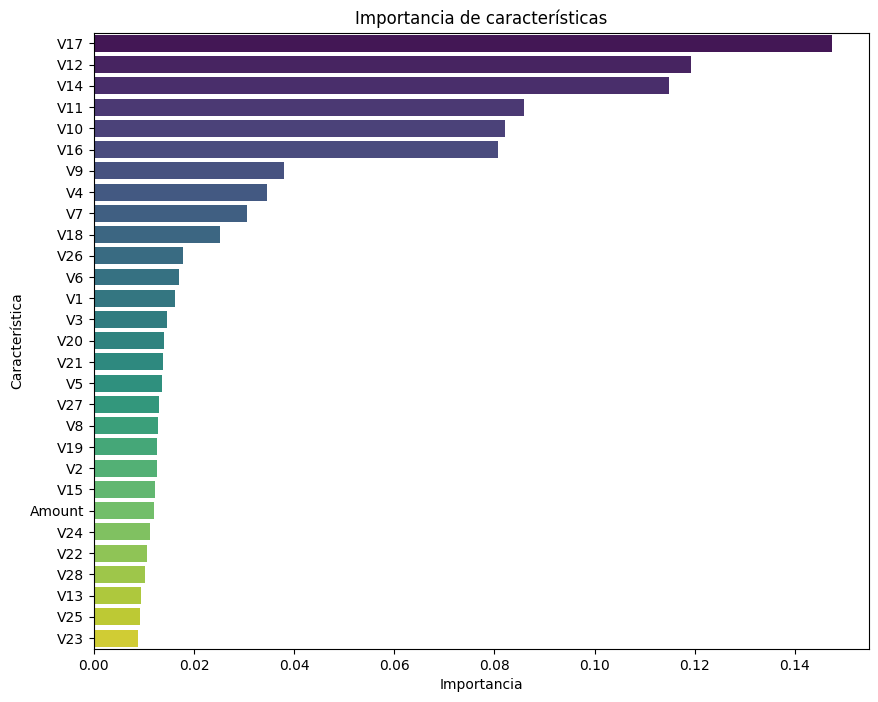

Precisión del clasificador Random Forest: 0.9995611109160493


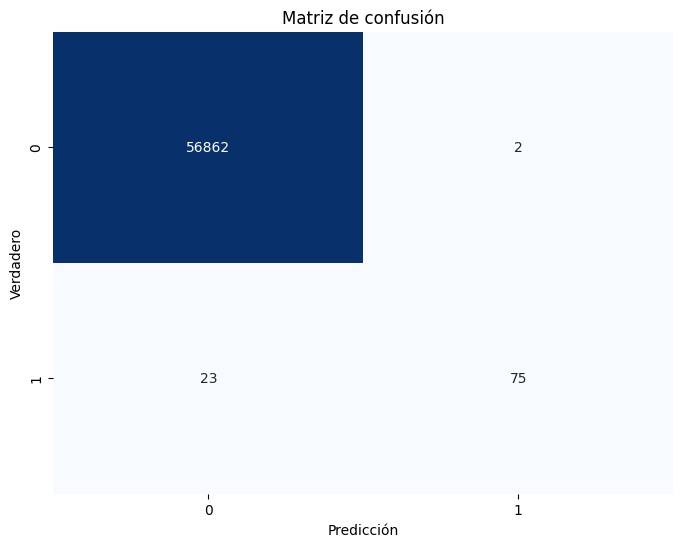

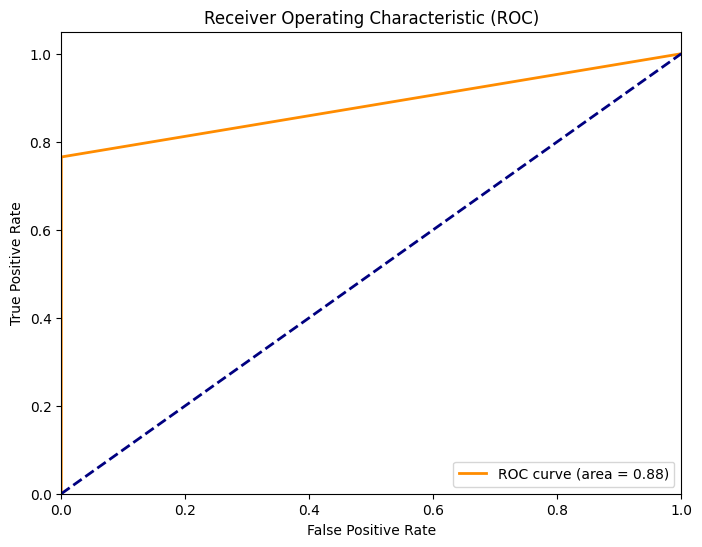

Ejemplos de transacciones clasificadas incorrectamente:
              V1        V2        V3        V4        V5        V6        V7  \
249239 -0.082983 -3.935919 -2.616709  0.163310 -1.400952 -0.809419  1.501580   
146790 -1.360293 -0.458069 -0.700404  2.737229 -1.005106  2.891399  5.802537   
261473 -2.349340  1.512604 -2.647497  1.753792  0.406328 -2.188494 -0.686935   
124176 -0.356326  1.435305 -0.813564  1.993117  2.055878 -0.543579  0.487691   
108258  0.196707  1.189757  0.704882  2.891388  0.045555  1.245730 -1.198714   

              V8        V9       V10  ...       V20       V21       V22  \
249239 -0.471000  1.519743 -1.134454  ...  1.878612  0.702672 -0.182305   
146790 -1.933197 -1.017717  1.987862  ... -1.493401 -0.936990 -0.053812   
261473 -0.547984 -0.099528 -1.672346  ... -0.093421 -0.088519 -0.595178   
124176  0.085449 -0.536352 -2.231209  ...  0.303262 -0.312863 -0.687874   
108258 -2.421616 -1.232089  0.324239  ...  0.646616 -1.328132  0.189311   

            

In [ ]:
# Importar librerías
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_openml

# Cargar el conjunto de datos de detección de fraudes en tarjetas de crédito
credit_card_data = fetch_openml(name='creditcard', version=1, as_frame=True, parser='auto')

# Convertir a formato DataFrame
df = credit_card_data.frame

# Separar características (X) y etiquetas (y)
X = df.drop(columns=['Class'])
y = df['Class']

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Visualización y preprocesamiento de los datos

# Visualización de la distribución de las clases
plt.figure(figsize=(8, 6))
sns.countplot(x=y_train, hue=y_train, palette='Set1', legend=False)
plt.title('Distribución de clases en el conjunto de entrenamiento')
plt.xlabel('Clase')
plt.ylabel('Número de transacciones')
plt.show()

# Preprocesamiento de los datos (opcional)
# Aquí puedes realizar cualquier preprocesamiento adicional necesario, como normalización, estandarización, manejo de datos faltantes, etc.

# Entrenar un clasificador Random Forest
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

# Visualizar árbol de decisión
plt.figure(figsize=(20, 10))
plot_tree(rf_clf.estimators_[0], filled=True, feature_names=X_train.columns, class_names=['0', '1'])
plt.show()

# Obtener importancia de características
feature_importances = rf_clf.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Visualizar importancia de características
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', hue='Feature', data=feature_importance_df, palette='viridis', dodge=False)
plt.title('Importancia de características')
plt.xlabel('Importancia')
plt.ylabel('Característica')
plt.show()


# Predecir en el conjunto de prueba usando el clasificador Random Forest
y_pred = rf_clf.predict(X_test)

# Calcular la precisión del clasificador Random Forest
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del clasificador Random Forest:", accuracy)

# Visualizar matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='d', cbar=False)
plt.title('Matriz de confusión')
plt.xlabel('Predicción')
plt.ylabel('Verdadero')
plt.show()

# Convertir las etiquetas de clase a valores numéricos
y_test_numeric = y_test.astype(int)
y_pred_numeric = y_pred.astype(int)

# Calcular la curva ROC y el área bajo la curva (AUC)
fpr, tpr, thresholds = roc_curve(y_test_numeric, y_pred_numeric)
roc_auc = auc(fpr, tpr)

# Visualizar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

# Información sobre clasificación incorrecta
incorrect_predictions = X_test[y_test != y_pred]
print("Ejemplos de transacciones clasificadas incorrectamente:")
print(incorrect_predictions.head())

**Entonces tenemos que:**

***Descripción del fenómeno/proceso modelado y el problema a abordar:***

* El proyecto se centra en la detección de fraudes en transacciones de tarjetas de crédito.
* El objetivo es desarrollar un modelo de aprendizaje automático supervisado que pueda identificar transacciones fraudulentas con alta precisión, minimizando así el impacto económico de tales actividades ilícitas en las instituciones financieras y los usuarios de tarjetas de crédito.

***Proceso de obtención/generación del conjunto de datos:***
* Se utiliza el conjunto de datos de detección de fraudes en tarjetas de crédito, disponible en la plataforma OpenML.
* Este conjunto de datos contiene información sobre diversas transacciones de tarjetas de crédito, incluidas características como el monto de la transacción, la hora, la cantidad de dinero, etc. Además, cada transacción está etiquetada como "fraude" o "no fraude".

***Descripción del problema de aprendizaje automático:***
* El problema se aborda como un problema de clasificación binaria supervisada, donde el modelo de aprendizaje automático debe clasificar cada transacción como "fraude" o "no fraude" basándose en las características proporcionadas.
* Se utiliza el algoritmo de Random Forest para construir el clasificador, dada su eficacia en problemas de clasificación y su capacidad para manejar conjuntos de datos con muchas características.

***Visualización y preprocesamiento de los datos:***
* Antes de entrenar el modelo, se realiza una visualización de la distribución de las clases en el conjunto de entrenamiento para comprender la proporción de transacciones fraudulentas y no fraudulentas.
* Además, se lleva a cabo un preprocesamiento opcional de los datos, que puede incluir normalización, estandarización o manejo de datos faltantes, según sea necesario.


***El problema de detección de fraudes en transacciones de tarjetas de crédito es de naturaleza supervisada:***

* Contamos con un conjunto de datos etiquetado.
* En este caso, cada transacción en nuestro conjunto de datos está etiquetada como "fraude" o "no fraude", lo que significa que tenemos información sobre el resultado deseado para cada instancia de datos.

* En un problema supervisado, el objetivo es predecir una variable objetivo basada en un conjunto de características predictoras.
* En este caso, la variable objetivo es la etiqueta de "fraude" o "no fraude", y las características predictoras son los atributos asociados con cada transacción, como el monto, la hora, la ubicación, entre otros.

* Utilizamos este conjunto de datos etiquetado para entrenar un modelo de aprendizaje automático, donde el modelo aprende patrones a partir de las características de las transacciones asociadas con sus respectivas etiquetas de fraude.
* Luego, podemos usar este modelo entrenado para predecir si nuevas transacciones son fraudulentas o no en función de las características observadas.

* Por lo tanto, dado que estamos realizando una predicción sobre una variable objetivo conocida y previamente etiquetada, este problema se clasifica como supervisado.

**Proceso de obtención/generación del conjunto de datos:**

El conjunto de datos utilizado para este proyecto es el conjunto de datos "creditcard" disponible en OpenML. Este conjunto de datos se utiliza comúnmente para la detección de fraudes en transacciones de tarjetas de crédito y contiene transacciones realizadas con tarjetas de crédito en septiembre de 2013 por titulares de tarjetas europeos. Los datos fueron proporcionados por empresas europeas de tarjetas de crédito y contienen transacciones realizadas en dos días, donde tenemos un total de 284,807 transacciones, de las cuales 492 son fraudulentas. Cabe destacar que el conjunto de datos está altamente desbalanceado, ya que las transacciones fraudulentas representan una pequeña fracción del total.

**Descripción del problema de aprendizaje automático:**

El problema de aprendizaje automático en este caso es la detección de fraudes en transacciones de tarjetas de crédito. El objetivo es desarrollar un modelo predictivo que pueda identificar transacciones fraudulentas basadas en las características asociadas con cada transacción. Dado que el conjunto de datos está etiquetado, este es un problema de clasificación supervisada, donde el modelo aprenderá a distinguir entre transacciones legítimas y fraudulentas utilizando un conjunto de características como entrada.

**Visualización y preprocesamiento de los datos:**

Antes de entrenar el modelo de aprendizaje automático, es importante comprender la distribución de las clases en el conjunto de datos y realizar cualquier preprocesamiento necesario. Para la visualización, se utiliza un gráfico de barras para mostrar la distribución de las clases (transacciones fraudulentas y legítimas) en el conjunto de entrenamiento. Además, se puede realizar preprocesamiento de datos adicional, como normalización, estandarización o manejo de datos faltantes si es necesario.

**SEGUNDA PARTE DEL PROYECTO**

In [1]:
!pip install pycaret

In [9]:
import pandas as pd
from sklearn.datasets import fetch_openml
from pycaret.classification import *

# Cargar el conjunto de datos de detección de fraudes en tarjetas de crédito
credit_card_data = fetch_openml(name='creditcard', version=1, as_frame=True, parser='auto')

# Convertir a formato DataFrame
df = credit_card_data.frame

# Configurar el entorno de pycaret y entrenar un modelo de clasificación
best_model = setup(data=df, target='Class', verbose=False, html=False, session_id=42).compare_models()

# Desplegar información sobre el mejor modelo
print(best_model)





Processing:   0%|          | 0/65 [00:00<?, ?it/s]


Processing:   5%|▍         | 3/65 [00:00<00:03, 19.04it/s]


Processing:   6%|▌         | 4/65 [00:12<00:03, 19.04it/s]


Processing:   8%|▊         | 5/65 [01:45<25:40, 25.67s/it]




Processing:  11%|█         | 7/65 [01:45<14:41, 15.20s/it]


Processing:  12%|█▏        | 8/65 [02:00<14:26, 15.20s/it]


Processing:  14%|█▍        | 9/65 [05:50<51:14, 54.90s/it]


Processing:  17%|█▋        | 11/65 [05:51<32:22, 35.98s/it]


Processing:  20%|██        | 13/65 [06:01<22:25, 25.88s/it]


Processing:  23%|██▎       | 15/65 [06:02<14:41, 17.63s/it]


Processing:  26%|██▌       | 17/65 [08:42<29:48, 37.25s/it]


Processing:  29%|██▉       | 19/65 [08:42<19:44, 25.75s/it]


Processing:  32%|███▏      | 21/65 [08:59<15:00, 20.48s/it]


Processing:  35%|███▌      | 23/65 [09:00<09:59, 14.28s/it]


Processing:  38%|███▊      | 25/65 [09:10<07:42, 11.57s/it]


Processing:  42%|████▏     | 27/65 [09:11<05:08,  8.11s/it]


Processing:  45%|████▍     | 29/65 [39:57<2:50:27, 284.10s/it]


Processing:  48%|████▊     | 31/65 [39:57<1:52:32, 198.59s/it]


Processing:  51%|█████     | 33/65 [40:12<1:15:15, 141.10s/it]


Processing:  54%|█████▍    | 35/65 [40:12<49:22, 98.75s/it]  

                                    Model  Accuracy  AUC  Recall   Prec.  \
et                 Extra Trees Classifier    0.9996  0.0  0.9996  0.9996   
xgboost         Extreme Gradient Boosting    0.9996  0.0  0.9996  0.9996   
rf               Random Forest Classifier    0.9995  0.0  0.9995  0.9995   
lda          Linear Discriminant Analysis    0.9994  0.0  0.9994  0.9994   
knn                K Neighbors Classifier    0.9993  0.0  0.9993  0.9992   
ada                  Ada Boost Classifier    0.9993  0.0  0.9993  0.9993   
lr                    Logistic Regression    0.9992  0.0  0.9992  0.9992   
svm                   SVM - Linear Kernel    0.9992  0.0  0.9992  0.9992   
dt               Decision Tree Classifier    0.9991  0.0  0.9991  0.9992   
ridge                    Ridge Classifier    0.9989  0.0  0.9989  0.9988   
gbc          Gradient Boosting Classifier    0.9989  0.0  0.9989  0.9987   
dummy                    Dummy Classifier    0.9983  0.0  0.9983  0.9966   
lightgbm  Li

**El propósito del código**

Cargar el conjunto de datos, prepararlo para su análisis y entrenar un modelo de clasificación utilizando PyCaret.
La columna 'Class' en este conjunto de datos indica si una transacción es fraudulenta (1) o no (0). Por lo tanto, el objetivo del modelo de clasificación será predecir si una transacción es fraudulenta o no, utilizando las características disponibles en el conjunto de datos.

***Importa las librerías necesarias:*** pandas para el manejo de datos, fetch_openml de sklearn.datasets para cargar el conjunto de datos, y setup y compare_models de pycaret.classification para configurar el entorno de PyCaret y entrenar modelos de clasificación, respectivamente.

Utiliza la función fetch_openml para cargar el conjunto de datos "creditcard" que contiene información sobre detección de fraudes en tarjetas de crédito. El parámetro as_frame=True indica que se cargará en formato DataFrame de pandas.

Convierte el conjunto de datos cargado en un DataFrame de pandas llamado df.

**Configura el entorno de PyCaret usando la función setup.** Se especifica que el objetivo de la clasificación es la columna "Class" del DataFrame df. Se establece verbose=False para evitar la visualización de mensajes de progreso, html=False para no guardar los resultados en un archivo HTML y session_id=42 para reproducibilidad.

**Entrena varios modelos de clasificación utilizando la función compare_models de PyCaret.** Esta función evalúa automáticamente varios algoritmos de clasificación en el conjunto de datos y devuelve el mejor modelo según una métrica específica.

Finalmente, imprime información sobre el mejor modelo seleccionado, que incluye detalles sobre el modelo y sus métricas de evaluación.




Processing: 100%|██████████| 65/65 [1:40:58<00:00, 16.53s/it]
                                                             

                                    Model  Accuracy  AUC  Recall   Prec.  \
et                 Extra Trees Classifier    0.9996  0.0  0.9996  0.9996   
xgboost         Extreme Gradient Boosting    0.9996  0.0  0.9996  0.9996   
rf               Random Forest Classifier    0.9995  0.0  0.9995  0.9995   
lda          Linear Discriminant Analysis    0.9994  0.0  0.9994  0.9994   
knn                K Neighbors Classifier    0.9993  0.0  0.9993  0.9992   
ada                  Ada Boost Classifier    0.9993  0.0  0.9993  0.9993   
lr                    Logistic Regression    0.9992  0.0  0.9992  0.9992   
svm                   SVM - Linear Kernel    0.9992  0.0  0.9992  0.9992   
dt               Decision Tree Classifier    0.9991  0.0  0.9991  0.9992   
ridge                    Ridge Classifier    0.9989  0.0  0.9989  0.9988   
gbc          Gradient Boosting Classifier    0.9989  0.0  0.9989  0.9987   
dummy                    Dummy Classifier    0.9983  0.0  0.9983  0.9966   
lightgbm  Li

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

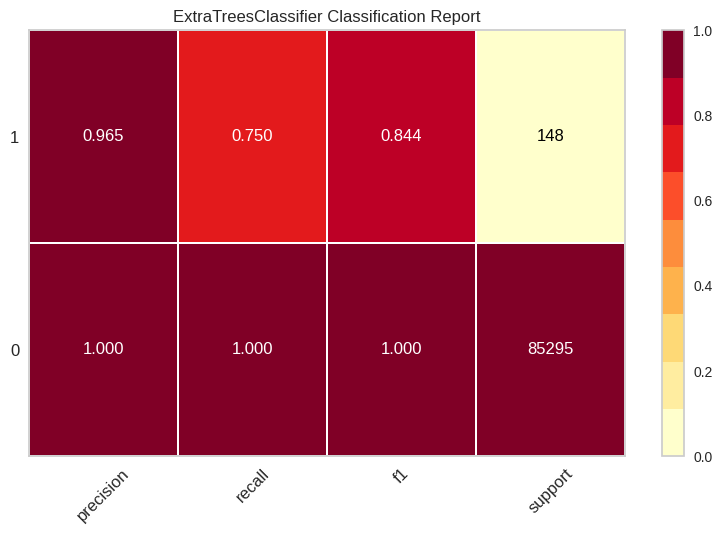

In [18]:
from pycaret.classification import *

# Configurar el entorno de pycaret y entrenar un modelo de clasificación
best_model = setup(data=df, target='Class', verbose=False, html=False, session_id=42)
best_model = compare_models()

# Desplegar información sobre el mejor modelo
evaluate_model(best_model)

# Visualizar la precisión de los modelos
plot_model(best_model, plot='class_report')


Este código se utiliza para entrenar y evaluar un modelo de clasificación utilizando PyCaret, una biblioteca de aprendizaje automático de alto nivel en Python. A continuación se describe paso a paso lo que hace cada parte del código:

**Importar funciones de PyCaret:** Se importan todas las funciones necesarias de la biblioteca de clasificación de PyCaret. Esto incluye funciones para configurar el entorno, comparar modelos, evaluar modelos y visualizar métricas de rendimiento.

**Configurar el entorno de PyCaret y entrenar un modelo de clasificación:**

setup: Se configura el entorno de PyCaret para el análisis de clasificación. Se especifica el conjunto de datos (df) y la columna objetivo ('Class'). Además, se establecen algunos parámetros opcionales, como verbose, html y session_id. Esto crea una configuración inicial para el análisis y prepara los datos para entrenar el modelo.
**compare_models(): **Se compara automáticamente varios modelos de clasificación utilizando validación cruzada. Esta función devuelve el mejor modelo basado en métricas de rendimiento como la precisión, el área bajo la curva ROC, la sensibilidad, etc. El mejor modelo se asigna a la variable best_model.
Evaluar el mejor modelo:

**evaluate_model(best_model):** Esta función muestra una serie de métricas de rendimiento del modelo seleccionado, como la matriz de confusión, la curva ROC, la precisión, la sensibilidad, etc. Esto proporciona una comprensión detallada del rendimiento del modelo en el conjunto de datos.
Visualizar la precisión de los modelos:

**plot_model(best_model, plot='class_report'):** Se visualiza un informe de clasificación para el mejor modelo. Este gráfico proporciona una visión general de varias métricas de rendimiento del modelo, como precisión, sensibilidad, especificidad, valor F1, etc., para cada clase en el problema de clasificación. Esto ayuda a comprender cómo el modelo se desempeña en la predicción de cada clase.